# RNN

Specifically designed with Sequence Data

Cells that are a function of inputs from the previous time steps are also known as Memory Cells

RNN are also flexible in their inputs and outputs for both sequences and single vector values

Input to output
* Sequence to Sequence
* Sequence to Vector
* Vector to Sequence

LSTM (Long Short Term Memory) and GRU(Gated Reccurent Unit) (Better version of LSTM)
An issue RNN face is that after a while the network will begin to "forget" the first input, as information is lost at each step going through the RNN. We need some sort of "long term memory" for out networks. LSTM cell was created to help address the RNN issue.

In neural network, we need to standardize or normalize the data

In [37]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Data
https://fred.stlouisfed.org/series/S4248SM144NCEN

In [38]:
df = pd.read_csv('Data/Alcohol_Sales.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [39]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [40]:
df.columns = ['Sales']

<AxesSubplot:xlabel='DATE'>

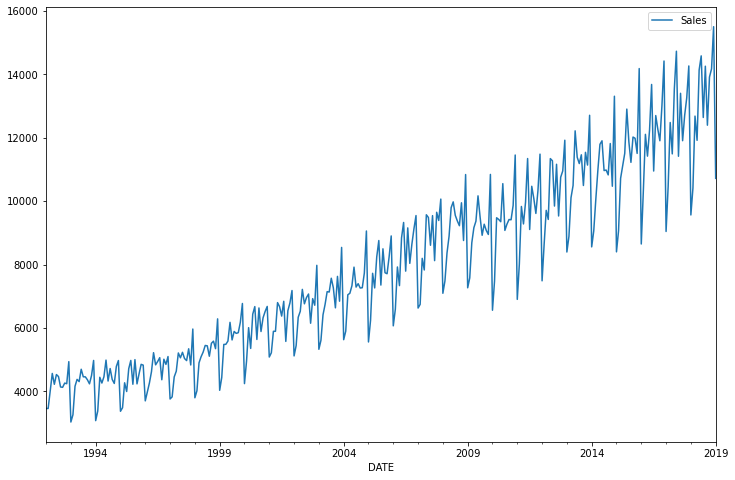

In [41]:
df.plot(figsize=(12,8))

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

<AxesSubplot:xlabel='DATE'>

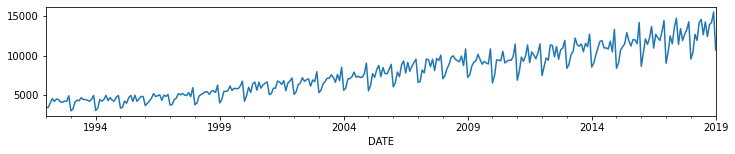

In [43]:
results = seasonal_decompose(df['Sales'])
results.observed.plot(figsize=(12,2))

<AxesSubplot:xlabel='DATE'>

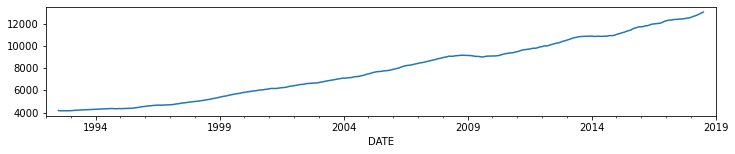

In [44]:
results.trend.plot(figsize=(12,2))

<AxesSubplot:xlabel='DATE'>

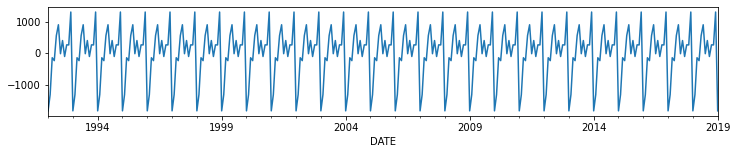

In [45]:
results.seasonal.plot(figsize=(12,2))

<AxesSubplot:xlabel='DATE'>

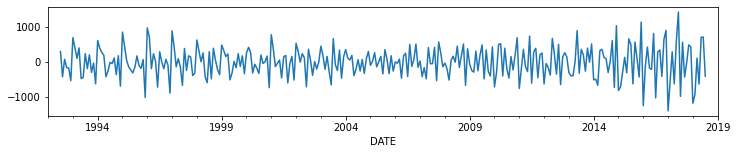

In [46]:
results.resid.plot(figsize=(12,2))

## Train Test Split

In [47]:
len(df)

325

In [48]:
325-12

313

In [49]:
train = df.iloc[:313]
test = df.iloc[313:]

In [50]:
len(test)

12

## Scale Data

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()

In [53]:
#We only fit the data to the training set
scaler.fit(train)

MinMaxScaler()

In [54]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [55]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [56]:
scaled_train

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624],
       [0.10334217],
       [0.16283443],
       [0.        ],
       [0.0196598 ],
       [0.09650397],
       [0.11505257],
       [0.10906915],
       [0.14231986],
       [0.12197624],
       [0.12189076],
       [0.11394136],
       [0.10300026],
       [0.12556629],
       [0.16608257],
       [0.00376101],
       [0.02957518],
       [0.12069408],
       [0.10513719],
       [0.12214719],
       [0.16702282],
       [0.11052227],
       [0.14428584],
       [0.11479614],
       [0.10402599],
       [0.14984187],
       [0.16582614],
       [0.02897684],
       [0.03872126],
       [0.10582101],
       [0.08231473],
       [0.14394393],
       [0.16608257],
       [0.10188905],
       [0.16830498],
       [0.10291478],
       [0.13018207],
       [0.15556885],
       [0.153

In [57]:
# define generator
n_input = 2

#How many columns we have
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [58]:
len(scaled_train)

313

In [59]:
len(generator) # n_input = 2

311

In [60]:
scaled_train

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624],
       [0.10334217],
       [0.16283443],
       [0.        ],
       [0.0196598 ],
       [0.09650397],
       [0.11505257],
       [0.10906915],
       [0.14231986],
       [0.12197624],
       [0.12189076],
       [0.11394136],
       [0.10300026],
       [0.12556629],
       [0.16608257],
       [0.00376101],
       [0.02957518],
       [0.12069408],
       [0.10513719],
       [0.12214719],
       [0.16702282],
       [0.11052227],
       [0.14428584],
       [0.11479614],
       [0.10402599],
       [0.14984187],
       [0.16582614],
       [0.02897684],
       [0.03872126],
       [0.10582101],
       [0.08231473],
       [0.14394393],
       [0.16608257],
       [0.10188905],
       [0.16830498],
       [0.10291478],
       [0.13018207],
       [0.15556885],
       [0.153

In [61]:
# What does the first batch look like?
X,y = generator[0]

In [62]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885]
Predict this y: 
 [[0.08299855]]


In [63]:
# Let's redefine to get 12 months back and then predict the next month out
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [64]:
# What does the first batch look like?
X,y = generator[0]

In [65]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885 0.08299855 0.13103684 0.1017181  0.12804513
 0.12266006 0.09453799 0.09359774 0.10496624 0.10334217 0.16283443]
Predict this y: 
 [[0.]]


### Create the Model

In [66]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [67]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [69]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
301/301 [==============================] - 4s 6ms/step - loss: 0.0400
Epoch 2/50
301/301 [==============================] - 1s 4ms/step - loss: 0.0090A: 0s - loss: 0.009 - ETA: 0s - lo
Epoch 3/50
301/301 [==============================] - 2s 6ms/step - loss: 0.0097
Epoch 4/50
301/301 [==============================] - 1s 4ms/step - loss: 0.0075
Epoch 5/50
301/301 [==============================] - 2s 7ms/step - loss: 0.0068
Epoch 6/50
301/301 [==============================] - 1s 4ms/step - loss: 0.0061A: 0s - loss: 0. - ETA: 0s - loss: 0.00 - ETA: 0s - l
Epoch 7/50
301/301 [==============================] - 2s 6ms/step - loss: 0.0052
Epoch 8/50
301/301 [==============================] - 1s 4ms/step - loss: 0.0032- ETA: 
Epoch 9/50
301/301 [==============================] - 2s 7ms/step - loss: 0.0028
Epoch 10/50
301/301 [==============================] - 1s 4ms/step - loss: 0.0024
Epoch 11/50
301/301 [==============================] - 2s 7ms/step - loss: 0.0033
Epoch 12/50
3

In [70]:
model.history.history.keys()

dict_keys(['loss'])

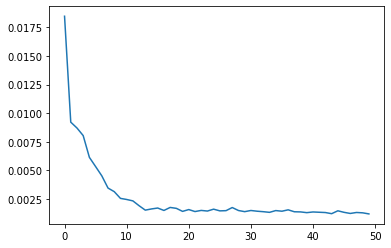

In [71]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaluate on Test Data

In [72]:
first_eval_batch = scaled_train[-12:]

In [73]:
first_eval_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [74]:
#Last n_input features from the training set
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [75]:
#Predict the 13th one using 12 months
model.predict(first_eval_batch)

array([[0.71566856]], dtype=float32)

In [76]:
scaled_test[0]

array([0.63116506])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [77]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [78]:
current_batch.shape

(1, 12, 1)

In [79]:
current_batch

array([[[0.63432772],
        [0.80776135],
        [0.72313873],
        [0.89870929],
        [1.        ],
        [0.71672793],
        [0.88648602],
        [0.75869732],
        [0.82742115],
        [0.87443371],
        [0.96025301],
        [0.5584238 ]]])

In [80]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.80776135],
        [ 0.72313873],
        [ 0.89870929],
        [ 1.        ],
        [ 0.71672793],
        [ 0.88648602],
        [ 0.75869732],
        [ 0.82742115],
        [ 0.87443371],
        [ 0.96025301],
        [ 0.5584238 ],
        [99.        ]]])

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [81]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]

#Reshape this to the same format RNN wants (same format as TimeSeriesGenerator)
current_batch = first_eval_batch.reshape((1, n_input, n_features))

#How far into the future can we predict --> Right now till len(test)
for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [82]:
test_predictions

[array([0.71566856], dtype=float32),
 array([0.8302202], dtype=float32),
 array([0.79738945], dtype=float32),
 array([0.95546854], dtype=float32),
 array([1.0172796], dtype=float32),
 array([0.7746351], dtype=float32),
 array([0.9219396], dtype=float32),
 array([0.8043249], dtype=float32),
 array([0.88051254], dtype=float32),
 array([0.92184776], dtype=float32),
 array([0.98433626], dtype=float32),
 array([0.60372436], dtype=float32)]

In [83]:
scaled_test

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

## Inverse Transformations and Compare

In [84]:
true_predictions = scaler.inverse_transform(test_predictions)

In [85]:
true_predictions

array([[11403.60647261],
       [12743.74638271],
       [12359.65914851],
       [14209.02639592],
       [14932.15433216],
       [12093.45576024],
       [13816.77151418],
       [12440.79729694],
       [13332.11615366],
       [13815.69695216],
       [14546.74987042],
       [10093.97129309]])

In [86]:
test

,Sales
DATE,
2018-02-01,10415
2018-03-01,12683
2018-04-01,11919
2018-05-01,14138
2018-06-01,14583
2018-07-01,12640
2018-08-01,14257
2018-09-01,12396
2018-10-01,13914


In [87]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

<ipython-input-87-53e06c23926f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [88]:
test

,Sales,Predictions
DATE,,
2018-02-01,10415,11403.606473
2018-03-01,12683,12743.746383
2018-04-01,11919,12359.659149
2018-05-01,14138,14209.026396
2018-06-01,14583,14932.154332
2018-07-01,12640,12093.455760
2018-08-01,14257,13816.771514
2018-09-01,12396,12440.797297
2018-10-01,13914,13332.116154


<AxesSubplot:xlabel='DATE'>

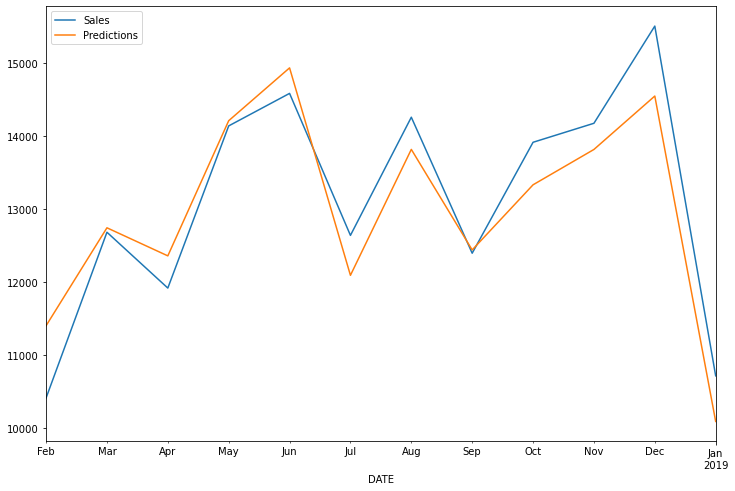

In [89]:
test.plot(figsize=(12,8))

# Saving and Loading Models

In [90]:
#model.save('my_rnn_model.h5')

## load a model

In [55]:
from keras.models import load_model
new_model = load_model('my_rnn_model.h5')

In [56]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
